# Visualizing Time Patterns with hvPlot

In this activity you we gain some additional practice working with the hvPlot grouped plots.

### Import Libraries and Dependencies

In [7]:
# Import necessary libraries and dependencies
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path

## 1. Read the S&P 500 volume into a DataFrame. (Make sure to declare the datetime index).

In [8]:
# Import data
sp500_path = Path('../Resources/sp500_stock_volume.csv')

# Read the S&P 500 volume into a DataFrame. (Make sure to declare the datetime index).
sp500_data = pd.read_csv(sp500_path,index_col='Date',parse_dates=True,infer_datetime_format=True)

# Display sample data
sp500_data

,close,volume
Date,,
2020-03-12 08:00:00,258.60,229683
2020-03-12 09:00:00,257.76,457488
2020-03-12 10:00:00,252.81,291881
2020-03-12 11:00:00,259.99,353484
2020-03-12 12:00:00,257.12,520699
...,...,...
2021-02-08 10:00:00,388.89,39322
2021-02-08 11:00:00,389.03,22696
2021-02-08 12:00:00,388.80,29164


## 2. Slice the dataframe so that it just includes the volume data.

In [9]:
# Slice the dataframe so that it just includes the volume data.
sp500_volume = sp500_data['volume']

## 3. Using hvPlot, plot the volume data according to the day of the week.

In [11]:
# Declare the group level to be the day of the week (e.g., Mon, Tues,...)
group_lvl = sp500_volume.index.dayofweek

# Plot average daily volume according to day of the week
sp500_volume.groupby(group_lvl).mean().hvplot()

:Curve   [Date]   (volume)

**Question:** On what day does trading in the S&P500 tend to be the most active?

**Answer:** Thursdays

## 4. Use hvPlot to visualize hourly trends for each day of the week in the form of a heatmap. 

In [12]:
# Use hvPlot to visualize the hourly trends across days of week in a heatmap
sp500_volume.hvplot.heatmap(
    x='index.hour',
    y='index.dayofweek',
    C='volume',
    cmap='blues',
    title='Hourly trends of trade volumes for days of the week'
).aggregate(function=np.mean)

:HeatMap   [index.hour,index.dayofweek]   (volume)

**Question:** Based on the above, does any day-of-week effect that you observe concentrate in just a few hours of that day?

**Answer:** Yes, around 9am and 2pm

## 5. Create a plot with hvPlot that shows the data grouped by the calendar week in the year (week of year).

/var/folders/l_/z3f0tw616952x5ddvbpxjdhr0000gn/T/ipykernel_85069/1373020616.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sp500_volume.groupby(by=[sp500_volume.index.year,sp500_volume.index.weekofyear]).mean().plot(


<Axes: title={'center': 'S&P500 trading volume by calendar week of year'}, xlabel='Year / Wk of year', ylabel='Volume'>

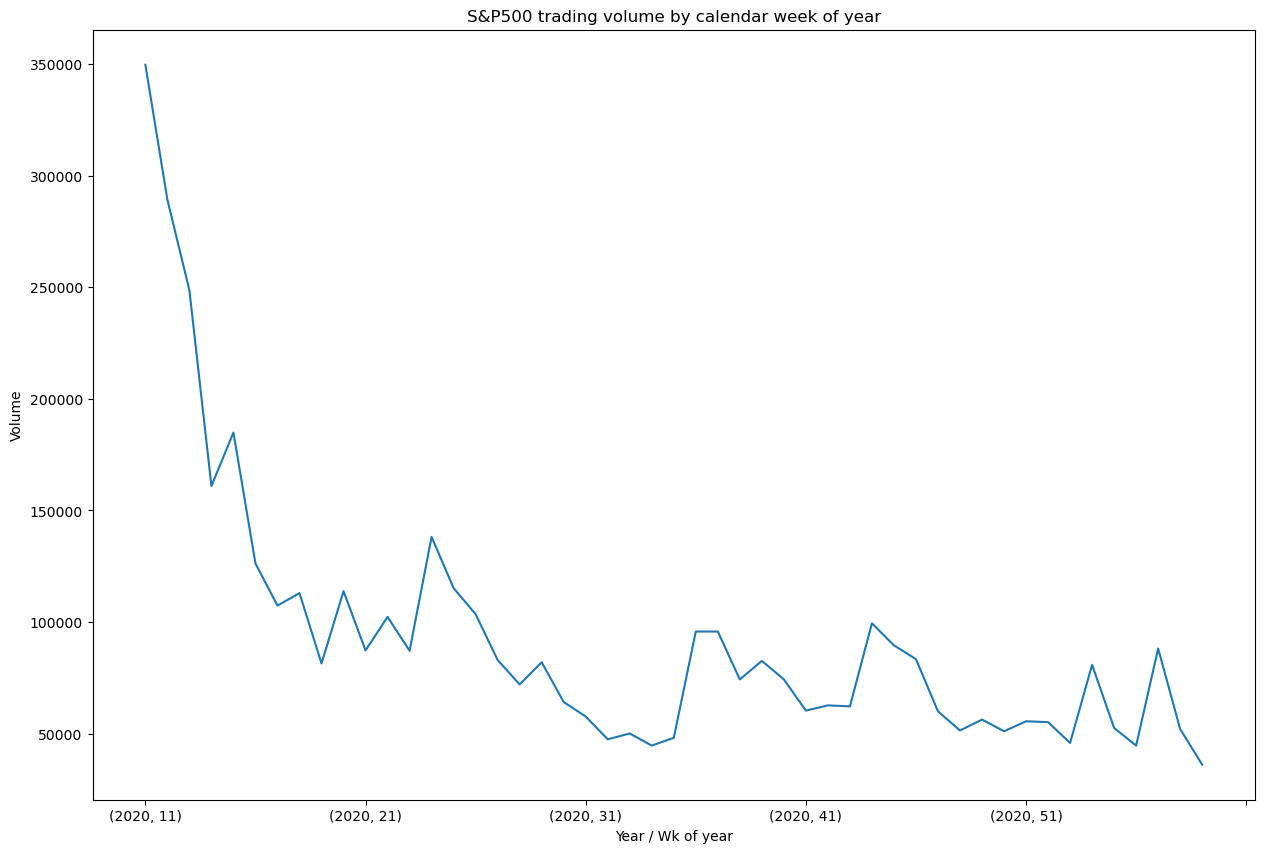

In [15]:
# Group the data by the calendar week in the year (week of year). 
sp500_volume.groupby(by=[sp500_volume.index.year,sp500_volume.index.weekofyear]).mean().plot(
    y='volume',
    xlabel='Year / Wk of year',
    ylabel='Volume',
    title='S&P500 trading volume by calendar week of year',
    figsize=[15,10]
)

**Question:** Does share trading intensity tend to increase at any particular time of the calendar year?

**Answer:** There seems to be an increase every 10 weeks, starting in week 14